In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error,mean_absolute_percentage_error
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM,Dropout, BatchNormalization, Dense
from keras.optimizers import adam_v2
import talib

In [2]:
# Get the data for the SPY ETF by specifying the stock ticker, start date, and end date
data = yf.download('0005.hk')
data.columns

[*********************100%***********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [3]:
data['H-L'] = data['High'] - data['Low']
data['O-C'] = data['Close'] - data['Open']
data['7day MA'] = data['Close'].shift(1).rolling(window = 7).mean()
data['14day MA'] = data['Close'].shift(1).rolling(window = 14).mean()
data['21day MA'] = data['Close'].shift(1).rolling(window = 21).mean()
data['Std_dev']= data['Close'].rolling(7).std()
# data['RSI'] = talib.RSI(data['Close'].values, timeperiod = 7)
# data['Williams %R'] = talib.WILLR(data['High'].values, data['Low'].values, data['Close'].values, 7)
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'H-L', 'O-C',
       '7day MA', '14day MA', '21day MA', 'Std_dev'],
      dtype='object')

In [4]:
data.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
H-L           0
O-C           0
7day MA       7
14day MA     14
21day MA     21
Std_dev       6
dtype: int64

In [5]:
data.dropna(inplace=True)
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
H-L          0
O-C          0
7day MA      0
14day MA     0
21day MA     0
Std_dev      0
dtype: int64

In [6]:
# data[0:5,0:4]
data_price=data["Close"]

In [7]:
train = data[0:int(len(data)*0.99)]
data_price=train["Close"]
train = train.values
# scl = MinMaxScaler()
# #Scale the data
# scl.fit(train.values.reshape(-1,1))
# cl =scl.transform(cl.values.reshape(-1,1))
sc = MinMaxScaler(feature_range=(0,1))
train=sc.fit_transform(train)
def processData(data,data_price,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb)])
        Y.append(data_price[(i+lb)])
    return np.array(X),np.array(Y)

lb=1
X,y = processData(train,data_price,lb)
X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
y_train,y_test = y[:int(y.shape[0]*0.90)].reshape(-1,1),y[int(y.shape[0]*0.90):].reshape(-1,1)
print(X.shape)
print(X_train.shape[0],X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])
print(y_train.shape[0])
print(y_test.shape[0])

(5339, 1, 12)
4805 1
534 1
4805
534


In [8]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(4805, 1, 12) (4805, 1) (534, 1, 12) (534, 1)


In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64 ,input_shape= (X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(
  loss='mean_squared_error',
  optimizer='Adam'
)

In [10]:
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)
 
model.summary() 

Epoch 1/300
151/151 [==============================] - 10s 4ms/step - loss: 10472.1540 - val_loss: 2136.0256
Epoch 2/300
151/151 [==============================] - 0s 1ms/step - loss: 8842.4096 - val_loss: 1419.1160
Epoch 3/300
151/151 [==============================] - 0s 1ms/step - loss: 6684.1533 - val_loss: 839.0375
Epoch 4/300
151/151 [==============================] - 0s 1ms/step - loss: 5211.6134 - val_loss: 450.9292
Epoch 5/300
151/151 [==============================] - 0s 1ms/step - loss: 4154.8637 - val_loss: 211.5657
Epoch 6/300
151/151 [==============================] - 0s 1ms/step - loss: 3354.5376 - val_loss: 81.6035
Epoch 7/300
151/151 [==============================] - 0s 1ms/step - loss: 2732.0567 - val_loss: 30.9953
Epoch 8/300
151/151 [==============================] - 0s 1ms/step - loss: 2242.2754 - val_loss: 36.4268
Epoch 9/300
151/151 [==============================] - 0s 1ms/step - loss: 1855.5498 - val_loss: 79.1864
Epoch 10/300
151/151 [========================

151/151 [==============================] - 0s 1ms/step - loss: 8.1941 - val_loss: 2.7871
Epoch 80/300
151/151 [==============================] - 0s 1ms/step - loss: 8.0604 - val_loss: 2.6447
Epoch 81/300
151/151 [==============================] - 0s 1ms/step - loss: 7.9282 - val_loss: 2.5087
Epoch 82/300
151/151 [==============================] - 0s 1ms/step - loss: 7.7974 - val_loss: 2.3795
Epoch 83/300
151/151 [==============================] - 0s 1ms/step - loss: 7.6679 - val_loss: 2.2576
Epoch 84/300
151/151 [==============================] - 0s 1ms/step - loss: 7.5396 - val_loss: 2.1430
Epoch 85/300
151/151 [==============================] - 0s 1ms/step - loss: 7.4125 - val_loss: 2.0356
Epoch 86/300
151/151 [==============================] - 0s 1ms/step - loss: 7.2865 - val_loss: 1.9353
Epoch 87/300
151/151 [==============================] - 0s 1ms/step - loss: 7.1617 - val_loss: 1.8420
Epoch 88/300
151/151 [==============================] - 0s 1ms/step - loss: 7.0381 - val_loss: 

151/151 [==============================] - 0s 1ms/step - loss: 3.2444 - val_loss: 1.4243
Epoch 159/300
151/151 [==============================] - 0s 1ms/step - loss: 3.2362 - val_loss: 1.4350
Epoch 160/300
151/151 [==============================] - 0s 1ms/step - loss: 3.2283 - val_loss: 1.4453
Epoch 161/300
151/151 [==============================] - 0s 1ms/step - loss: 3.2208 - val_loss: 1.4552
Epoch 162/300
151/151 [==============================] - 0s 1ms/step - loss: 3.2136 - val_loss: 1.4647
Epoch 163/300
151/151 [==============================] - 0s 1ms/step - loss: 3.2067 - val_loss: 1.4739
Epoch 164/300
151/151 [==============================] - 0s 1ms/step - loss: 3.2001 - val_loss: 1.4827
Epoch 165/300
151/151 [==============================] - 0s 1ms/step - loss: 3.1937 - val_loss: 1.4911
Epoch 166/300
151/151 [==============================] - 0s 1ms/step - loss: 3.1877 - val_loss: 1.4992
Epoch 167/300
151/151 [==============================] - 0s 1ms/step - loss: 3.1819 - v

151/151 [==============================] - 0s 1ms/step - loss: 2.9926 - val_loss: 1.6721
Epoch 238/300
151/151 [==============================] - 0s 1ms/step - loss: 2.9907 - val_loss: 1.6727
Epoch 239/300
151/151 [==============================] - 0s 1ms/step - loss: 2.9888 - val_loss: 1.6734
Epoch 240/300
151/151 [==============================] - 0s 1ms/step - loss: 2.9870 - val_loss: 1.6741
Epoch 241/300
151/151 [==============================] - 0s 1ms/step - loss: 2.9851 - val_loss: 1.6748
Epoch 242/300
151/151 [==============================] - 0s 1ms/step - loss: 2.9833 - val_loss: 1.6755
Epoch 243/300
151/151 [==============================] - 0s 1ms/step - loss: 2.9814 - val_loss: 1.6763
Epoch 244/300
151/151 [==============================] - 0s 1ms/step - loss: 2.9796 - val_loss: 1.6770
Epoch 245/300
151/151 [==============================] - 0s 1ms/step - loss: 2.9778 - val_loss: 1.6778
Epoch 246/300
151/151 [==============================] - 0s 1ms/step - loss: 2.9759 - v

In [11]:
# history = model.fit(
#     X_train, y_train,
#     epochs=100,
#     batch_size=16,
#     validation_split=0.1,
#     verbose=1,
#     shuffle=False
# )

In [12]:
y_pred = model.predict(X_test)

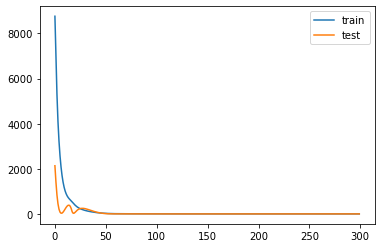

In [13]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

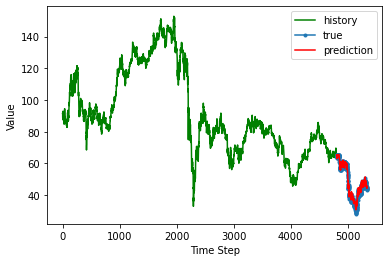

In [14]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

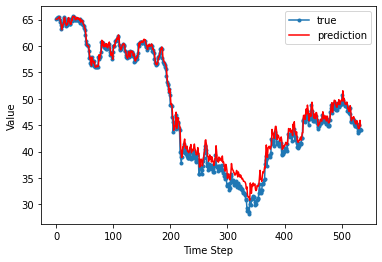

In [15]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [16]:
error1=mean_absolute_percentage_error(y_test,y_pred)
error1*100

2.517119744936198

In [17]:
mean_squared_error(y_test,y_pred)

1.731220250431526

In [18]:
def MBE(y_true, y_pred):
    '''
    Parameters:
        y_true (array): Array of observed values
        y_pred (array): Array of prediction values

    Returns:
        mbe (float): Biais score
    '''
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_true = y_true.reshape(len(y_true),1)
    y_pred = y_pred.reshape(len(y_pred),1)   
    diff = (y_true-y_pred)
    mbe = diff.mean()
    print('MBE = ', mbe)

MBE(y_test,y_pred)

MBE =  -0.8198319267244375
